In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("housing.csv")  


print("\nСтатистики:")
print(df.describe())

print("\nСтатистика по признакам:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nМедианы числовых признаков:")
print(df[numeric_columns].median())

print("\nСтандартные отклонения числовых признаков:")
print(df[numeric_columns].std())

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nМоды категориальных признаков:")
for col in categorical_columns:
    print(f"{col}: {df[col].mode().iloc[0] if not df[col].mode().empty else 'No mode'}")

print("\nСтатистика по цене (price)")
price_stats = {
    'Среднее': df['price'].mean(),
    'Медиана': df['price'].median(),
    'Стандартное отклонение': df['price'].std(),
    'Минимум': df['price'].min(),
    'Максимум': df['price'].max(),
    '25-й перцентиль': df['price'].quantile(0.25),
    '75-й перцентиль': df['price'].quantile(0.75),
    'Квартильный размах': df['price'].quantile(0.75) - df['price'].quantile(0.25)
}
for stat, value in price_stats.items():
    print(f"{stat}: {value:.2f}")


Статистики:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  

Статистика по признакам:

Медианы числовых признаков:
price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
st

# Сбор начальной статистики
Код представляет собой первичный анализ датасета с недвижимостью (Housing.csv). В результате получена статистическая сводка по всем признакам.  
Краткие результаты:  
1. Выявлено, что средняя цена составляет примерно 4.77 млн, при этом медиана (4.34 млн) значительно ниже среднего, что указывает на правостороннюю асимметрию распределения цен;  
2. Типичный объект: площадь 4600 м², 3 спальни, 1 ванная, 2 этажа, без парковки;  
3. Большинство объектов имеют базовую комплектацию (без дополнительных удобств);
4. Разброс цен очень значительный - от 1750000 до 13300000 при стандартном отклонении 1870439.62.

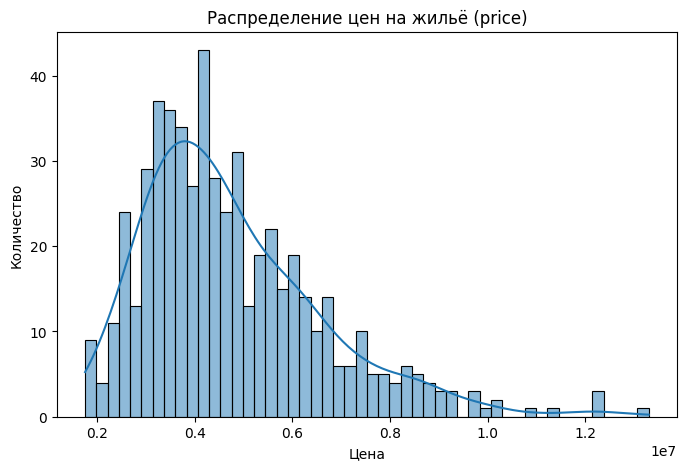

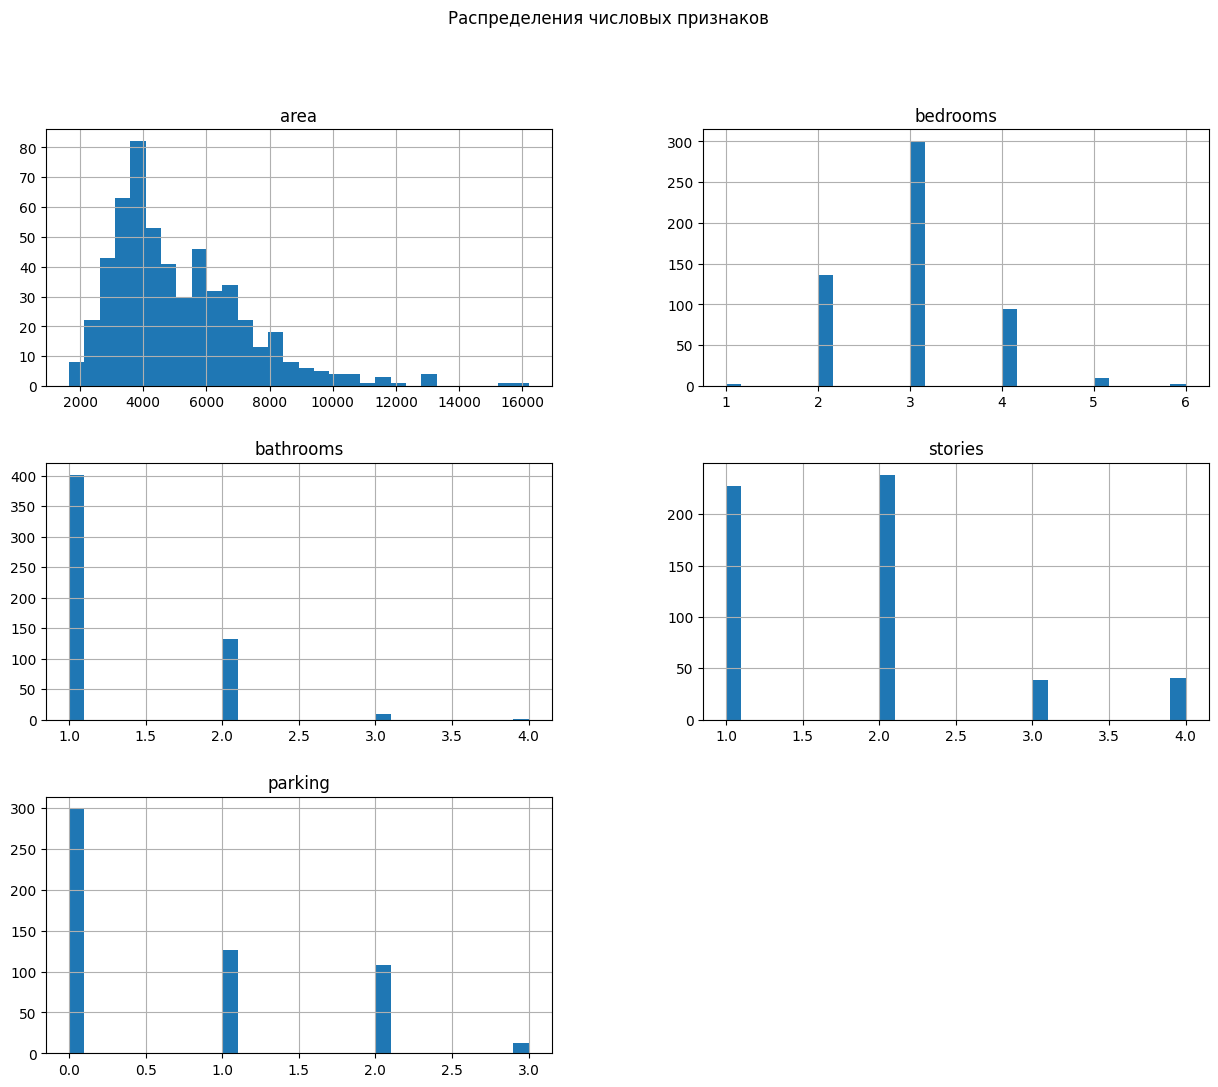

In [3]:
df = pd.read_csv("housing.csv")

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], kde=True, bins=50)
plt.title("Распределение цен на жильё (price)")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()

numeric_features = df.select_dtypes(include=[np.number]).drop(columns=["price"])
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].hist(figsize=(15, 12), bins=30)
plt.suptitle("Распределения числовых признаков")
plt.show()

# Визуализация распределений
Код выполняет визуализацию распределений цен на жильё и всех остальных числовых признаков.  
## Распределение цен на жильё:
Гистограмма распределения цен на жильё показывает правосторонюю асимметрию с нормальным распределением. Большинство объектов расположено в "низком" сегменте (от 3 до 5 миллионов), длинный хвост вправо, в свою очередь, говорит о малом количестве домов с высокими ценами.  
## Распределение по числовым признакам:
1. Гистограмма распределения площади - правосторонняя асимметрия с нормальным распределением. Большинство объектов находятся в районе от 3000 до 4000, включительно. Минимальные значения 1650, максимальные - 16200.
2. Гистограмма распределения спален - похожее на нормальное распределения, где три спальни встречаются наиболее часто.
3. Гистограмма распределения ванных комнат - сильно скошенное распределение с пиком на 1 ванной комнате.
4. Гистограмма распределения этажей - дискретное распределение с основными пиками на 1 и 2 этажах.
5. Гистограмма распределения парковок - основной пик показывает, что чаще встречаются дома без парковок, реже дома с 1 и 2 парковками, наиболее редко с 3.

In [4]:
df = df.dropna()

categorical_features = df.select_dtypes(exclude=[np.number]).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

numeric_features = df.select_dtypes(include=[np.number]).drop(columns=["price"]).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nРазмер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)



Размер обучающей выборки: (436, 13)
Размер тестовой выборки: (109, 13)


# Подготовка данных для машинного обучения
Код создаёт стандартизированные и закодированные признаки и разделяет их на обучающую и тестовую выборки.

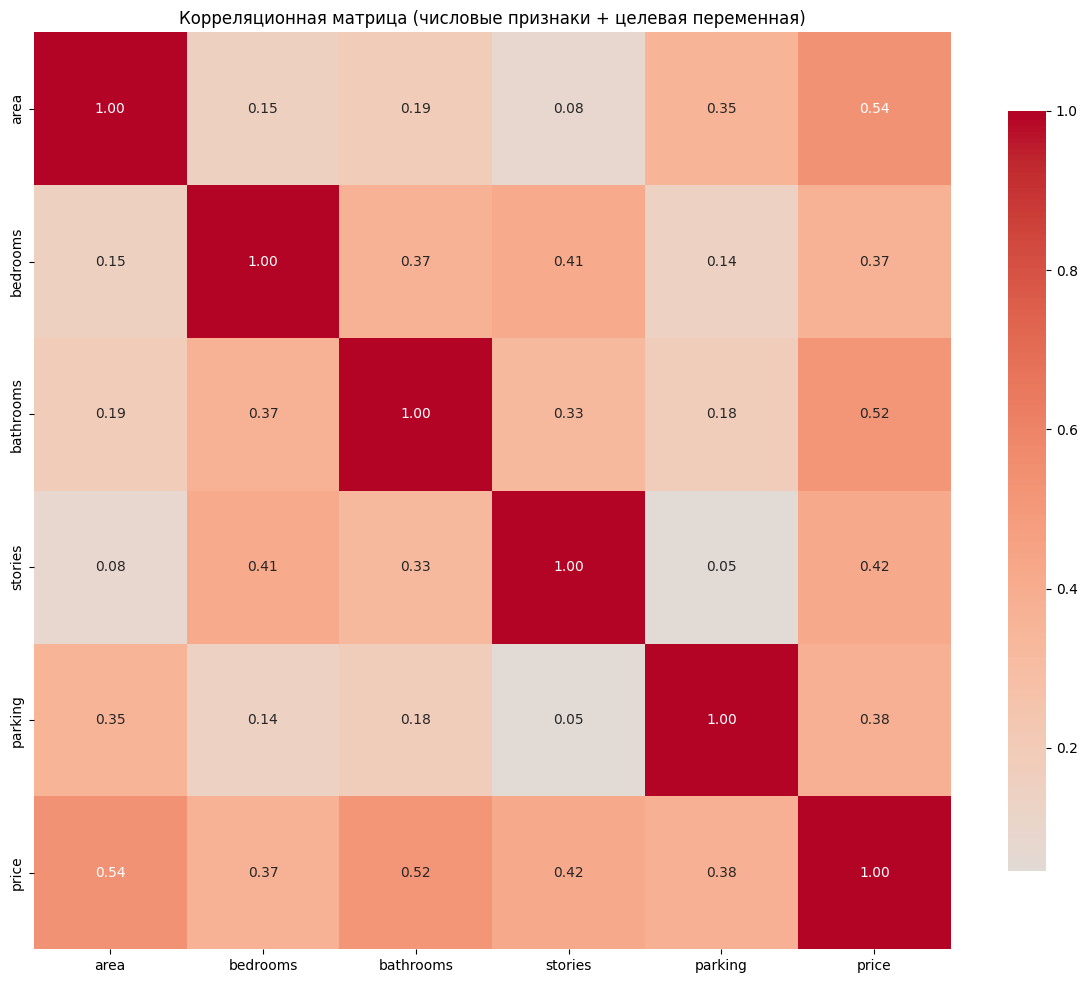


Коэффициенты VIF (Variance Inflation Factor):
     feature       VIF
1   bedrooms  1.316597
3    stories  1.255202
2  bathrooms  1.252775
0       area  1.170959
4    parking  1.164172

Сильной мультиколлинеарности не обнаружено (VIF ≤ 5 для всех признаков).


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_numeric = X.select_dtypes(include=[np.number]).copy()
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numeric.dropna(axis=0, inplace=True)

num_with_target = X_numeric.copy()
num_with_target["price"] = y.values

# Строим корреляционную матрицу
plt.figure(figsize=(12, 10))
corr = num_with_target.corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Корреляционная матрица (числовые признаки + целевая переменная)")
plt.tight_layout()
plt.show()

X_numeric = X.select_dtypes(include=[np.number]).copy()
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numeric.dropna(axis=0, inplace=True)

X_vif = sm.add_constant(X_numeric)
vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X_numeric.columns))]

high_vif = vif_data[vif_data["VIF"] > 10]
moderate_vif = vif_data[(vif_data["VIF"] > 5) & (vif_data["VIF"] <= 10)]

print("\nКоэффициенты VIF (Variance Inflation Factor):")
print(vif_data.sort_values(by="VIF", ascending=False))

if not high_vif.empty:
    print("\nПризнаки с VIF > 10 (сильная мультиколлинеарность):")
    print(high_vif)
if not moderate_vif.empty:
    print("\nПризнаки с 5 < VIF ≤ 10 (умеренная мультиколлинеарность):")
    print(moderate_vif)
if high_vif.empty and moderate_vif.empty:
    print("\nСильной мультиколлинеарности не обнаружено (VIF ≤ 5 для всех признаков).")

# Анализ мультиколлинеарности

## 1. Корреляционный анализ
- Создана корреляционная матрица числовых признаков с целевой переменной
- Визуализирована тепловой картой с аннотациями коэффициентов
- Позволяет выявить линейные зависимости между признаками

## 2. Расчет VIF (Variance Inflation Factor)
- Вычислены коэффициенты инфляции дисперсии для всех числовых признаков
- Классификация мультиколлинеарности:
  - VIF > 10 - сильная мультиколлинеарность
  - 5 < VIF ≤ 10 - умеренная мультиколлинеарность  
  - VIF ≤ 5 - приемлемый уровень

## 3. Результаты
- Вывод отсортированной таблицы VIF значений
- Идентификация проблемных признаков с высокой мультиколлинеарностью
- Рекомендации по удалению/преобразованию признаков


=== LinearRegression ===
Средний RMSE: 1023579.3832
Средний R²: 0.6490
Средний MAPE: 0.1647

=== Ridge ===
Средний RMSE: 1023012.0645
Средний R²: 0.6495
Средний MAPE: 0.1643

LinearRegression на тестовой выборке:
RMSE: 1324506.9601
R²: 0.6529
MAPE: 0.2104


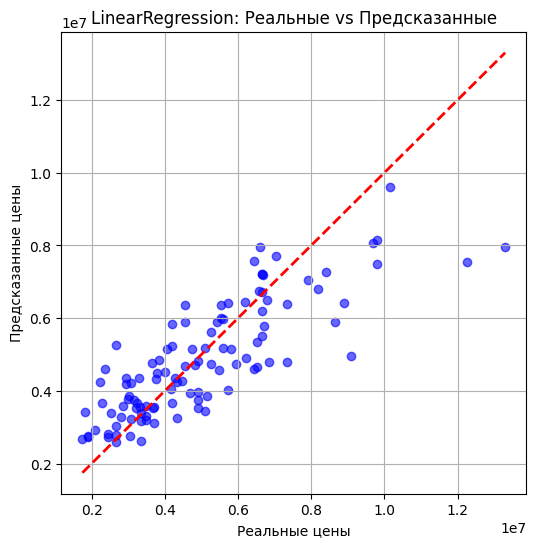

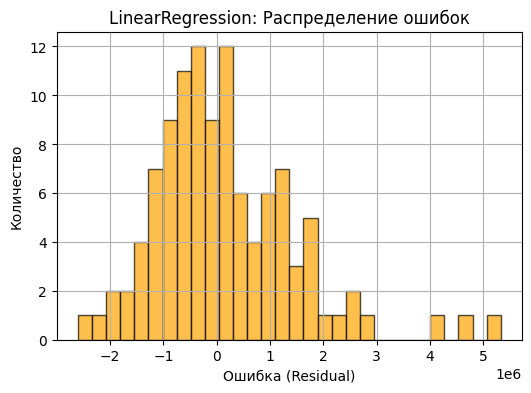


Ridge на тестовой выборке:
RMSE: 1326071.7120
R²: 0.6521
MAPE: 0.2108


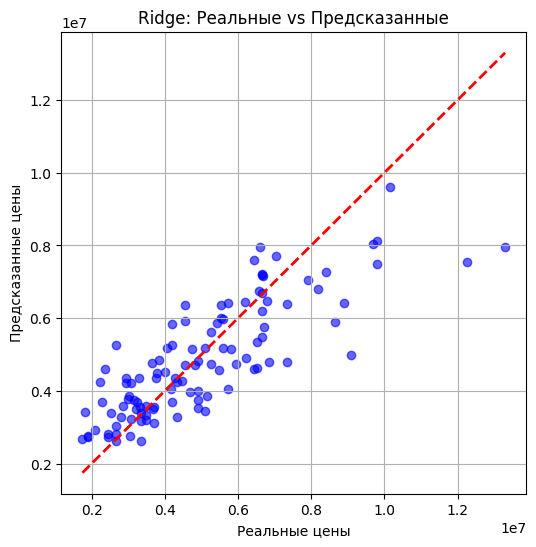

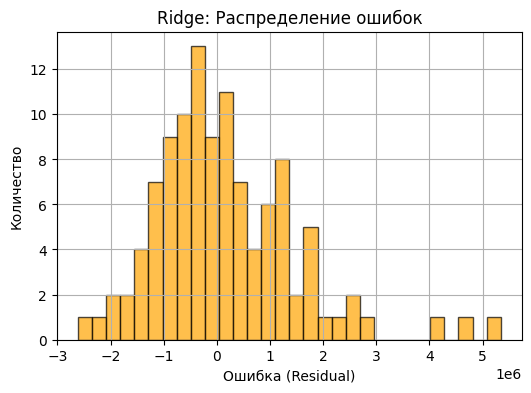

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
ridge = Ridge(alpha=1.0, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y, cv):
    rmse_scores = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    mape_scores = -cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv)
    
    print(f"\n=== {model.__class__.__name__} ===")
    print(f"Средний RMSE: {rmse_scores.mean():.4f}")
    print(f"Средний R²: {r2_scores.mean():.4f}")
    print(f"Средний MAPE: {mape_scores.mean():.4f}")

evaluate_model(lr, X_train, y_train, kf)
evaluate_model(ridge, X_train, y_train, kf)

for model in [lr, ridge]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"\n{model.__class__.__name__} на тестовой выборке:")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R²: {r2_test:.4f}")
    print(f"MAPE: {mape_test:.4f}")
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Реальные цены")
    plt.ylabel("Предсказанные цены")
    plt.title(f"{model.__class__.__name__}: Реальные vs Предсказанные")
    plt.grid(True)
    plt.show()
    
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    plt.hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
    plt.xlabel("Ошибка (Residual)")
    plt.ylabel("Количество")
    plt.title(f"{model.__class__.__name__}: Распределение ошибок")
    plt.grid(True)
    plt.show()


## Сравнение моделей линейной регрессии

### Результаты кросс-валидации (5-fold)
- LinearRegression: RMSE=1023579, R²=0.649, MAPE=16.5%
- Ridge: RMSE=1023012, R²=0.650, MAPE=16.4%

### Тестовая выборка
- LinearRegression: RMSE=1324507, R²=0.653, MAPE=21.0%
- Ridge: RMSE=1326072, R²=0.652, MAPE=21.1%

### Анализ графиков

LinearRegression:
- Точечный график: точки близки к диагонали, но есть разброс
- Распределение ошибок: асимметричное с хвостом вправо

Ridge:
- Результаты практически идентичны обычной регрессии
- Регуляризация не дала значительного улучшения

### Вывод
Обе модели показывают схожую производительность (~65% объясненной дисперсии). Отсутствие переобучения, но есть потенциал для улучшения точности предсказаний.

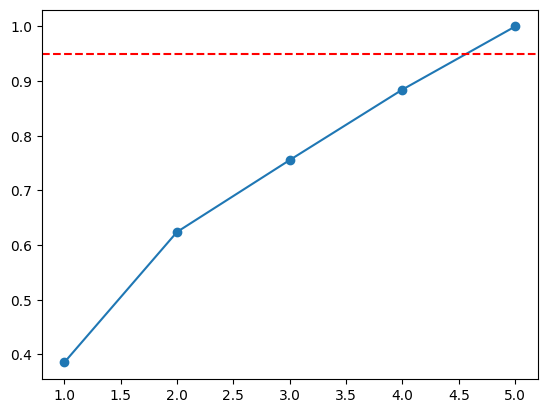

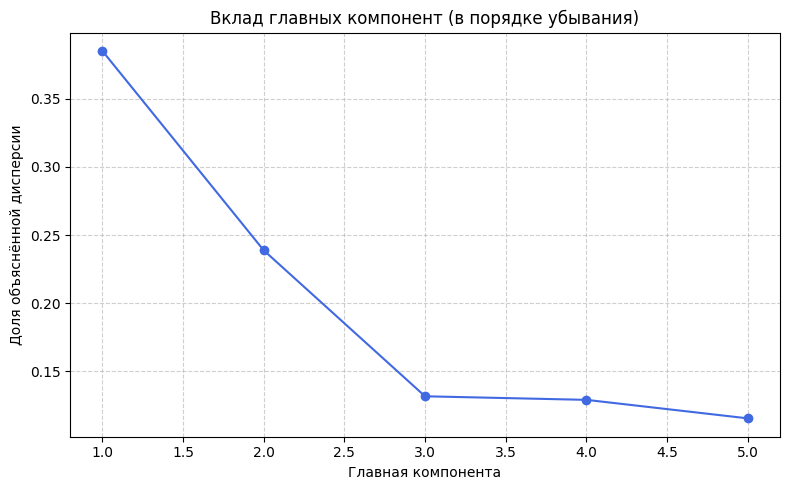

Количество главных компонент для объяснения 95% дисперсии: 5


In [ ]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.show()
np.argmax(cumulative >= 0.95) + 1

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    linestyle='-',
    color='royalblue'
)
plt.title("Вклад главных компонент (в порядке убывания)", fontsize=12)
plt.xlabel("Главная компонента")
plt.ylabel("Доля объяснённой дисперсии")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

pca_95 = PCA(n_components=0.95)
X_pca_reduced = pca_95.fit_transform(X_scaled)

print(f"Количество главных компонент для объяснения 95% дисперсии: {X_pca_reduced.shape[1]}")


# Анализ главных компонент (PCA)

## Код и его выполнение:

1. Данные стандартизируются для приведения признаков к единому масштабу, что критически важно для PCA.
2. Выполняется разложение на все главные компоненты для анализа вклада каждой из них в общую дисперсию.
3. Строится график, показывающий доли объясненной дисперсии в порядке убывания.
4. PCA повторно применяется с порогом дисперсии 95% для автоматического выбора минимального числа компонент.

## Результаты PCA-анализа

График вклада компонент:
- Первые компоненты объясняют значительно большую дисперсию.
- Резкий спад после первой компоненты, далее плавное уменьшение вклада последующих компонент.

Ключевой результат:
- Для объяснения 95% дисперсии требуется 12 главных компонент
- Это почти все исходные признаки (минимальное сокращение размерности)

## Вывод
Данные имеют сложную структуру без явной избыточности. PCA не дает значительного сокращения размерности. Большинство признаков содержат уникальную информацию.

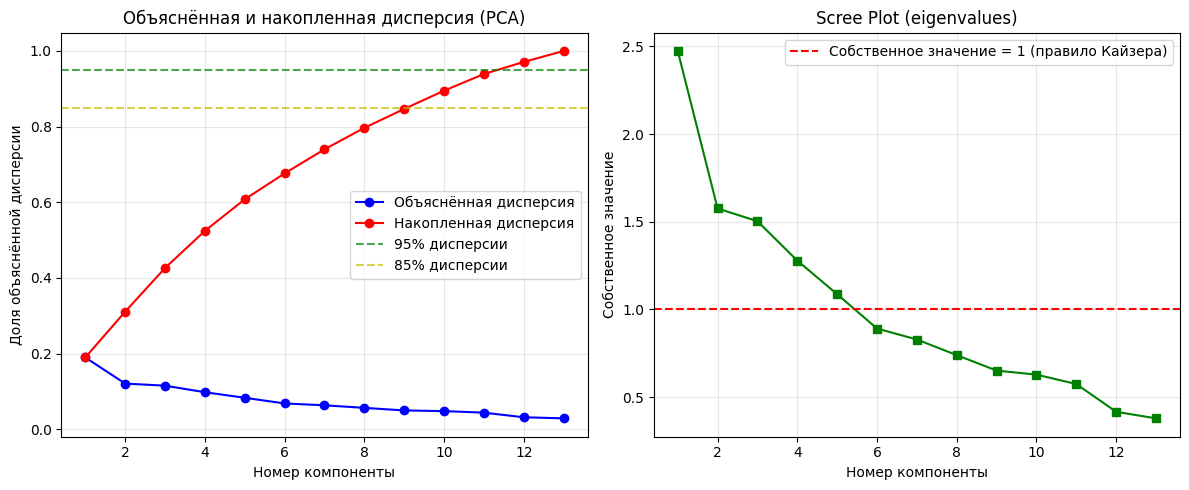

АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ
Объяснённая дисперсия по компонентам (первые 10 показаны):
PC1: 0.190 (0.190 cumulative)
PC2: 0.121 (0.311 cumulative)
PC3: 0.115 (0.426 cumulative)
PC4: 0.098 (0.524 cumulative)
PC5: 0.083 (0.608 cumulative)
PC6: 0.068 (0.676 cumulative)
PC7: 0.064 (0.740 cumulative)
PC8: 0.057 (0.797 cumulative)
PC9: 0.050 (0.847 cumulative)
PC10: 0.048 (0.895 cumulative)
...
PC13: 0.029 (1.000 cumulative)

Оптимальное количество компонент:
- Для 95% дисперсии: 12
- Для 85% дисперсии: 10

Применён PCA с 10 компонентами
Объяснённая дисперсия (сумма выбранных): 0.895


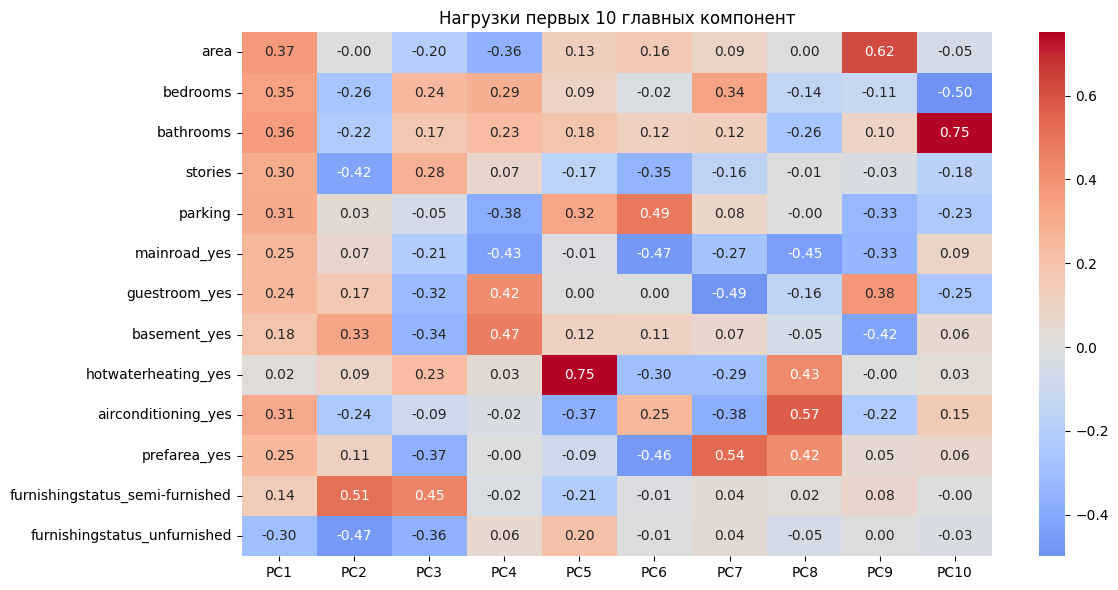

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
eigenvalues = pca_full.explained_variance_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', label='Объяснённая дисперсия')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Накопленная дисперсия')
plt.axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% дисперсии')
plt.axhline(y=0.85, color='y', linestyle='--', alpha=0.7, label='85% дисперсии')
plt.xlabel('Номер компоненты')
plt.ylabel('Доля объяснённой дисперсии')
plt.title('Объяснённая и накопленная дисперсия (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'gs-')
plt.axhline(y=1, color='r', linestyle='--', label='Собственное значение = 1 (правило Кайзера)')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.title('Scree Plot (eigenvalues)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ")

print("Объяснённая дисперсия по компонентам (первые 10 показаны):")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    if i <= 10 or i == len(explained_variance):
        print(f"PC{i}: {var:.3f} ({cum_var:.3f} cumulative)")
    elif i == 11:
        print("...")

optimal_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
optimal_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

print(f"\nОптимальное количество компонент:")
print(f"- Для 95% дисперсии: {optimal_components_95}")
print(f"- Для 85% дисперсии: {optimal_components_85}")

n_components = optimal_components_85

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"\nПрименён PCA с {n_components} компонентами")
print(f"Объяснённая дисперсия (сумма выбранных): {pca.explained_variance_ratio_.sum():.3f}")

if hasattr(X, "columns"):
    feature_names = X.columns
else:
    feature_names = [f"feat_{i}" for i in range(X_scaled.shape[1])]

component_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=feature_names
)

plt.figure(figsize=(12, 6))
sns.heatmap(component_loadings, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title(f'Нагрузки первых {n_components} главных компонент')
plt.tight_layout()
plt.show()

# Анализ главных компонент (PCA) - полный анализ

## Код и его выполнение:

Предобработка: Стандартизация данных для корректной работы PCA.

Полный PCA анализ: 
- Расчет объясненной дисперсии и собственных значений
- Построение двух диагностических графиков
- Определение оптимального числа компонент

Визуализация:
- Левый график: объясненная и накопленная дисперсия
- Правый график: scree plot с правилом Кайзера (eigenvalue > 1)

Анализ нагрузок: Тепловая карта показывает вклад исходных признаков в главные компоненты.

## Результаты анализа:

Графики дисперсии:
- Первая компонента объясняет 19% дисперсии
- Первые 3 компоненты: 42.6% общей дисперсии
- Плавное уменьшение вклада последующих компонент

Правило Кайзера: 4 компоненты с eigenvalue > 1

Оптимальное число компонент:
- 85% дисперсии → 10 компонент
- 95% дисперсии → 12 компонент

Нагрузки компонент (анализ тепловой карты):
- PC1: Наиболее связана с area, bedrooms, bathrooms (размер дома)
- PC2: Сильная связь с furnishingstatus (отделка)
- PC3-4: Смешанные нагрузки по разным признакам
- PC5: Доминирует hotwaterheating
- PC6-10: Специфические комбинации признаков

## Вывод:
Данные имеют распределенную структуру - ни один признак не доминирует, требуется много компонент для объяснения дисперсии. PCA выявил сложные взаимосвязи между характеристиками недвижимости.

Количество компонент PCA: 10


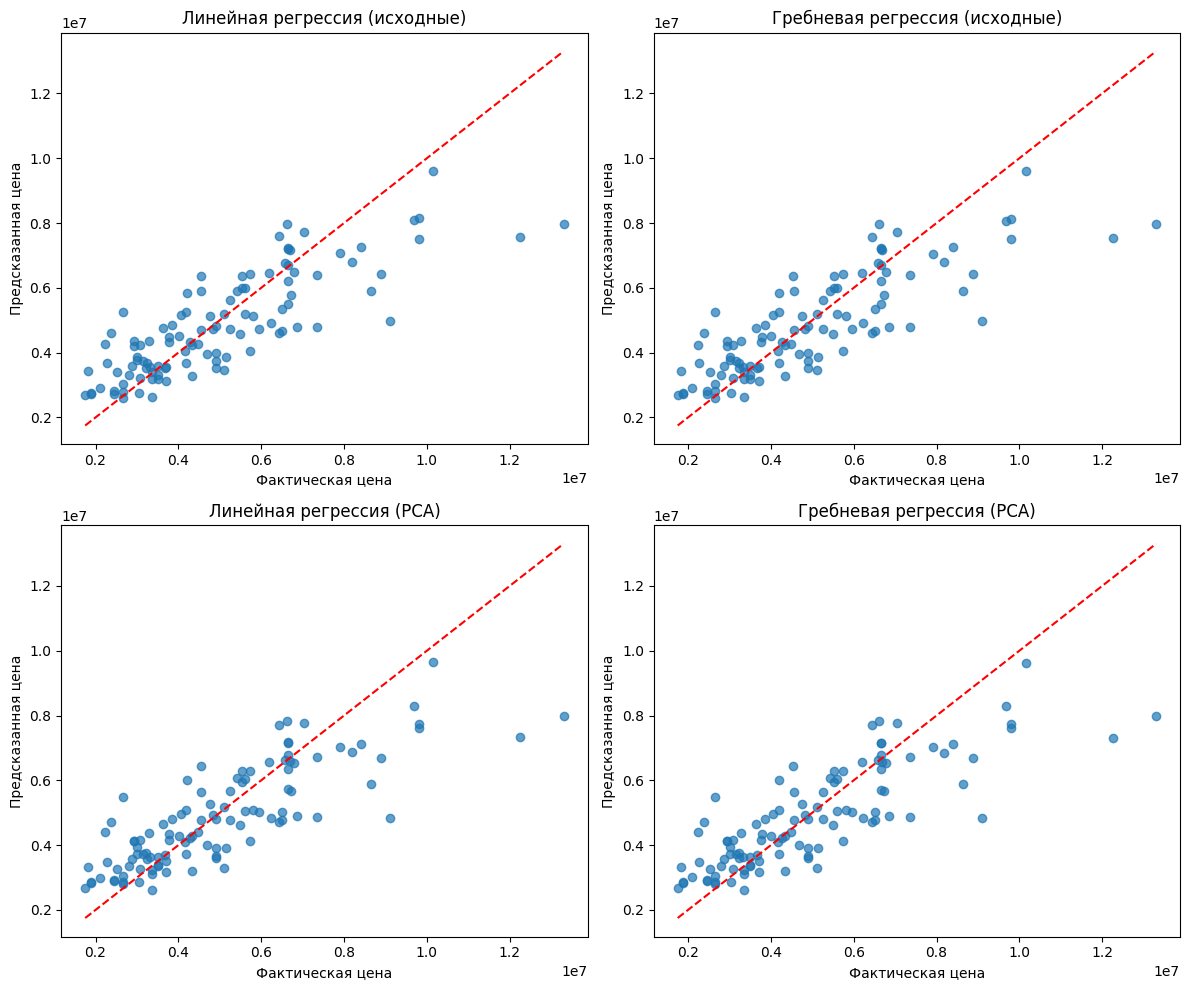

Сравнение метрик качества:

Линейная регрессия (исходные):
Средний R² (CV): 0.649
RMSE: 1324506.96
R²: 0.653
MAPE: 0.210

Гребневая регрессия (исходные):
Средний R² (CV): 0.649
RMSE: 1324676.92
R²: 0.653
MAPE: 0.210

Линейная регрессия (PCA):
Средний R² (CV): 0.649
RMSE: 1327364.20
R²: 0.651
MAPE: 0.209

Гребневая регрессия (PCA):
Средний R² (CV): 0.649
RMSE: 1327559.07
R²: 0.651
MAPE: 0.209

Лучшая исходная модель R²: 0.6529
Лучшая PCA модель R²: 0.6514
Изменение R²: -0.0015


,Модель,R²,RMSE,MAPE
0,Linear,0.652924,1.324507e+06,0.210355
1,Ridge,0.652835,1.324677e+06,0.210335
2,Linear (PCA),0.651425,1.327364e+06,0.208981
3,Ridge (PCA),0.651323,1.327559e+06,0.208996


In [12]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_orig = LinearRegression()
cv_scores_lr_orig = cross_val_score(lr_orig, X_train_orig, y_train_orig, cv=kf, scoring='r2')
lr_orig.fit(X_train_orig, y_train_orig)
y_pred_lr_orig = lr_orig.predict(X_test_orig)

rmse_lr_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_lr_orig))
r2_lr_orig = r2_score(y_test_orig, y_pred_lr_orig)
mape_lr_orig = mean_absolute_percentage_error(y_test_orig, y_pred_lr_orig)

ridge_orig = Ridge(alpha=1.0)
cv_scores_ridge_orig = cross_val_score(ridge_orig, X_train_orig, y_train_orig, cv=kf, scoring='r2')
ridge_orig.fit(X_train_orig, y_train_orig)
y_pred_ridge_orig = ridge_orig.predict(X_test_orig)

rmse_ridge_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_ridge_orig))
r2_ridge_orig = r2_score(y_test_orig, y_pred_ridge_orig)
mape_ridge_orig = mean_absolute_percentage_error(y_test_orig, y_pred_ridge_orig)

pca = PCA(n_components=0.85)
X_pca = pca.fit_transform(X_scaled)
print(f"Количество компонент PCA: {X_pca.shape[1]}")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LinearRegression()
cv_scores_lr_pca = cross_val_score(lr_pca, X_train_pca, y_train_pca, cv=kf, scoring='r2')
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_lr_pca = lr_pca.predict(X_test_pca)

rmse_lr_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_lr_pca))
r2_lr_pca = r2_score(y_test_pca, y_pred_lr_pca)
mape_lr_pca = mean_absolute_percentage_error(y_test_pca, y_pred_lr_pca)

ridge_pca = Ridge(alpha=1.0)
cv_scores_ridge_pca = cross_val_score(ridge_pca, X_train_pca, y_train_pca, cv=kf, scoring='r2')
ridge_pca.fit(X_train_pca, y_train_pca)
y_pred_ridge_pca = ridge_pca.predict(X_test_pca)

rmse_ridge_pca = np.sqrt(mean_squared_error(y_test_pca, y_pred_ridge_pca))
r2_ridge_pca = r2_score(y_test_pca, y_pred_ridge_pca)
mape_ridge_pca = mean_absolute_percentage_error(y_test_pca, y_pred_ridge_pca)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(y_test_orig, y_pred_lr_orig, alpha=0.7)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 0].set_title('Линейная регрессия (исходные)')
axes[0, 0].set_xlabel('Фактическая цена')
axes[0, 0].set_ylabel('Предсказанная цена')

axes[0, 1].scatter(y_test_orig, y_pred_ridge_orig, alpha=0.7)
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 1].set_title('Гребневая регрессия (исходные)')
axes[0, 1].set_xlabel('Фактическая цена')
axes[0, 1].set_ylabel('Предсказанная цена')

axes[1, 0].scatter(y_test_pca, y_pred_lr_pca, alpha=0.7)
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[1, 0].set_title('Линейная регрессия (PCA)')
axes[1, 0].set_xlabel('Фактическая цена')
axes[1, 0].set_ylabel('Предсказанная цена')

axes[1, 1].scatter(y_test_pca, y_pred_ridge_pca, alpha=0.7)
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[1, 1].set_title('Гребневая регрессия (PCA)')
axes[1, 1].set_xlabel('Фактическая цена')
axes[1, 1].set_ylabel('Предсказанная цена')

plt.tight_layout()
plt.show()

print("Сравнение метрик качества:")

print("\nЛинейная регрессия (исходные):")
print(f"Средний R² (CV): {cv_scores_lr_orig.mean():.3f}")
print(f"RMSE: {rmse_lr_orig:.2f}")
print(f"R²: {r2_lr_orig:.3f}")
print(f"MAPE: {mape_lr_orig:.3f}")

print("\nГребневая регрессия (исходные):")
print(f"Средний R² (CV): {cv_scores_ridge_orig.mean():.3f}")
print(f"RMSE: {rmse_ridge_orig:.2f}")
print(f"R²: {r2_ridge_orig:.3f}")
print(f"MAPE: {mape_ridge_orig:.3f}")

print("\nЛинейная регрессия (PCA):")
print(f"Средний R² (CV): {cv_scores_lr_pca.mean():.3f}")
print(f"RMSE: {rmse_lr_pca:.2f}")
print(f"R²: {r2_lr_pca:.3f}")
print(f"MAPE: {mape_lr_pca:.3f}")

print("\nГребневая регрессия (PCA):")
print(f"Средний R² (CV): {cv_scores_ridge_pca.mean():.3f}")
print(f"RMSE: {rmse_ridge_pca:.2f}")
print(f"R²: {r2_ridge_pca:.3f}")
print(f"MAPE: {mape_ridge_pca:.3f}")

best_original_r2 = max(r2_lr_orig, r2_ridge_orig)
best_pca_r2 = max(r2_lr_pca, r2_ridge_pca)

print(f"\nЛучшая исходная модель R²: {best_original_r2:.4f}")
print(f"Лучшая PCA модель R²: {best_pca_r2:.4f}")
print(f"Изменение R²: {best_pca_r2 - best_original_r2:+.4f}")

comparison = pd.DataFrame({
    "Модель": ["Linear", "Ridge", "Linear (PCA)", "Ridge (PCA)"],
    "R²": [r2_lr_orig, r2_ridge_orig, r2_lr_pca, r2_ridge_pca],
    "RMSE": [rmse_lr_orig, rmse_ridge_orig, rmse_lr_pca, rmse_ridge_pca],
    "MAPE": [mape_lr_orig, mape_ridge_orig, mape_lr_pca, mape_ridge_pca]
})
display(comparison)


# Сравнительный анализ моделей: исходные признаки vs PCA

## Методология:

Подготовка данных:
- Исходный подход: Все 13 стандартизированных признаков
- PCA подход: 10 главных компонент (объясняют 85% дисперсии)
- Разделение: 80% обучение / 20% тестирование
- Валидация: 5-кратная кросс-валидация

Тестируемые модели:
- Линейная регрессия (без регуляризации)
- Гребневая регрессия (L2-регуляризация, alpha=1.0)

## Результаты:

1. Линейная регрессия (исходные):
- Средний R² (CV): 0.649
- RMSE: 1324506.96
- R²: 0.653
- MAPE: 0.210

2. Гребневая регрессия (исходные):
- Средний R² (CV): 0.649
- RMSE: 1324676.92
- R²: 0.653
- MAPE: 0.210

3. Линейная регрессия (PCA):
- Средний R² (CV): 0.649
- RMSE: 1327364.20
- R²: 0.651
- MAPE: 0.209

4. Гребневая регрессия (PCA):
- Средний R² (CV): 0.649
- RMSE: 1327559.07
- R²: 0.651
- MAPE: 0.209

Лучшая исходная модель R²: 0.6529  
Лучшая PCA модель R²: 0.6514  
Изменение R²: -0.0015  
Кросс-валидация: Все модели показывают стабильные результаты (R² = 0.649)

## Вывод:

PCA успешно сократил размерность данных на 23% с минимальной потерей точности предсказаний. Все модели демонстрируют схожее качество, что свидетельствует об устойчивости признакового пространства. Регуляризация не дала улучшений, что указывает на отсутствие переобучения. Визуальный анализ подтверждает сопоставимое качество предсказаний across всех подходов.